In [82]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly 
import plotly.express as px

from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier


In [83]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df=df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [84]:
df.duplicated().sum()

0

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [86]:
y = df['stroke']
print(f'Percentage of patient had a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: % 4.87 --> (249 patient)
Percentage of patient did not have a stroke: % 95.13 --> (4861 patient)


In [87]:
fig = px.histogram(df, x="stroke", title='Stroke', width=400, height=400)
fig.show()

In [88]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']

numerical = ['age','avg_glucose_level', 'bmi']

In [89]:
df[numerical].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [90]:
df[numerical].skew()

age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64

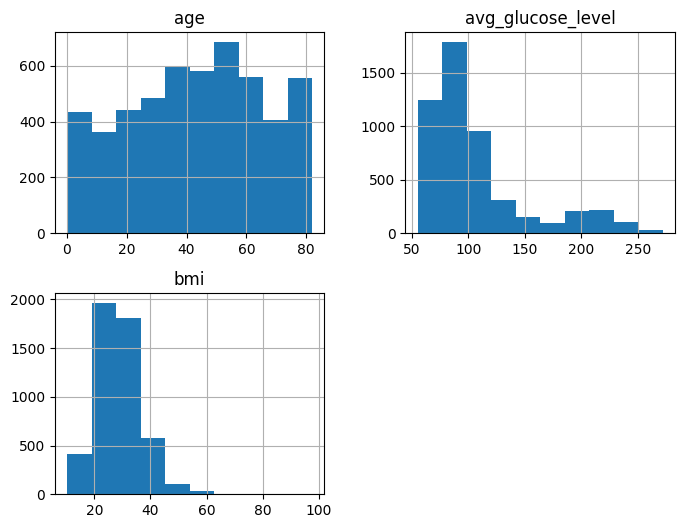

In [91]:
df[numerical].hist(figsize=(8,6));

In [92]:
print (f'{round(df["gender"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="gender", title='Gender', width=400, height=400)
fig.show()

gender
Female    58.59
Male      41.39
Other      0.02
Name: proportion, dtype: float64


In [93]:
print (f'{round(df["hypertension"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="hypertension", title='hypertension', width=400, height=400)
fig.show()

hypertension
0    90.25
1     9.75
Name: proportion, dtype: float64


In [94]:
print (f'{round(df["heart_disease"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="heart_disease", title='heart_disease', width=400, height=400)
fig.show()

heart_disease
0    94.6
1     5.4
Name: proportion, dtype: float64


In [95]:
print (f'{round(df["ever_married"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="ever_married", title='ever_married', width=400, height=400)
fig.show()

ever_married
Yes    65.62
No     34.38
Name: proportion, dtype: float64


In [96]:
print (f'{round(df["work_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="work_type", title='work_type', width=400, height=400)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

work_type
Private          57.24
Self-employed    16.03
children         13.44
Govt_job         12.86
Never_worked      0.43
Name: proportion, dtype: float64


In [97]:
print (f'{round(df["Residence_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="Residence_type", title='Residence_type', width=400, height=400)
fig.show()

Residence_type
Urban    50.8
Rural    49.2
Name: proportion, dtype: float64


In [98]:
print (f'{round(df["smoking_status"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="smoking_status", title='smoking_status', width=400, height=400)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

smoking_status
never smoked       37.03
Unknown            30.22
formerly smoked    17.32
smokes             15.44
Name: proportion, dtype: float64


In [99]:
fig = px.histogram(df, x="hypertension", color="stroke",width=400, height=400)
fig.show()

In [100]:
print (f'A female person has a probability of {round(df[df["gender"]=="Female"]["stroke"].mean()*100,2)} % get a stroke')
print (f'A male person has a probability of {round(df[df["gender"]=="Male"]["stroke"].mean()*100,2)} % get a stroke')
print (f'A person from  the other category of gender has a probability of {round(df[df["gender"]=="Other"]["stroke"].mean()*100,2)} % get a stroke')


A female person has a probability of 4.71 % get a stroke
A male person has a probability of 5.11 % get a stroke
A person from  the other category of gender has a probability of 0.0 % get a stroke


In [101]:
fig = px.histogram(df, x="gender", color="stroke",width=400, height=400)
fig.show()

In [102]:
print (f'A formerly smoked person has a probability of {round(df[df["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)} % get a stroke')
print (f'A person never smoked has a probability of {round(df[df["smoking_status"]=="never smoked"]["stroke"].mean()*100,2)} % get a stroke')
print (f'A person smokes has a probability of {round(df[df["smoking_status"]=="smokes"]["stroke"].mean()*100,2)} % get a stroke')
print (f'A person whom smoking history is not known,has a probability of {round(df[df["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)} % get a stroke')


A formerly smoked person has a probability of 7.91 % get a stroke
A person never smoked has a probability of 4.76 % get a stroke
A person smokes has a probability of 5.32 % get a stroke
A person whom smoking history is not known,has a probability of 3.04 % get a stroke


In [103]:
fig = px.histogram(df, x="smoking_status", color="stroke",width=600, height=600)
fig.show()

In [104]:
from sklearn.metrics import mutual_info_score
def cat_mut_inf(series):
    return mutual_info_score(series, df['stroke']) 

df_cat = df[categorical].apply(cat_mut_inf) 
df_cat = df_cat.sort_values(ascending=False).to_frame(name='mutual_info_score') 
df_cat

,mutual_info_score
ever_married,0.006950
work_type,0.006825
hypertension,0.005976
heart_disease,0.005897
smoking_status,0.002750
Residence_type,0.000120
gender,0.000051


In [105]:
df[numerical].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


In [106]:
df[['age','avg_glucose_level','bmi','stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.333398,0.245257
avg_glucose_level,0.238171,1.000000,0.175502,0.131945
bmi,0.333398,0.175502,1.000000,0.042374
stroke,0.245257,0.131945,0.042374,1.000000


(5110, 10) (5110,)
>LR 0.839 (0.029)
>LDA 0.833 (0.030)
>SVM 0.649 (0.064)


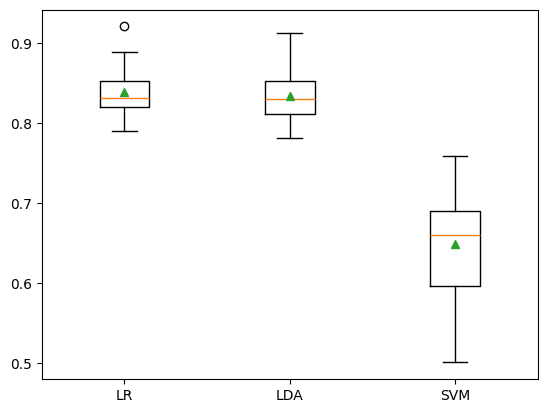

In [107]:
def load_data ():
    df = pd.read_csv('healthcare-dataset-stroke-data.csv')
    df=df.drop('id', axis=1)
    categorical = [ 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']
    numerical = ['avg_glucose_level', 'bmi','age']
    y= df['stroke']
    X = df.drop('stroke', axis=1)
    return X,y,categorical, numerical


def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=1)
    return scores

def get_models():
    models, names = list(), list()
    models.append(LogisticRegression(solver='liblinear'))    
    names.append('LR')
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    return models, names


X,y,categorical, numerical= load_data()
print(X.shape, y.shape)

models, names = get_models()
results = list()

for i in range(len(models)):
    transformer = ColumnTransformer(transformers=[('imp',SimpleImputer(strategy='median'),numerical),('o',OneHotEncoder(),categorical)])
    pipeline = Pipeline(steps=[('t', transformer),('p',PowerTransformer(method='yeo-johnson')),('m', models[i])])    
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()